# Install Library

In [ ]:
!pip install sentence-transformers datasets torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410

In [ ]:
!pip install accelerate -U
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install sentence_transformers

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import spacy
from scipy.spatial.distance import cosine
from sentence_transformers import (
    SentenceTransformer,
    SentencesDataset,
    InputExample,
    losses,
    evaluation,
)
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split
import re

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Data/Data.xlsx")
#print(df.columns)
df.columns = ['Nama', 'Soal', 'Kunci Jawaban', 'Jawaban Siswa', 'Skor']
#print(df.columns)

In [ ]:
print(len(df))

1200


# Visualisasi Data

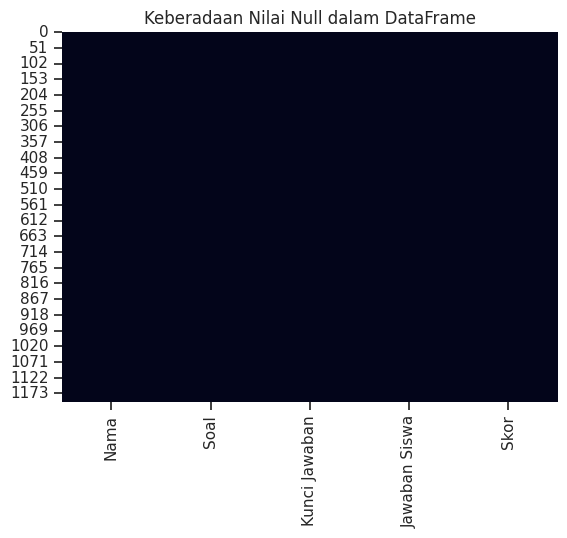

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="ticks")
sns.heatmap(df.isnull(), cbar=False)
plt.title('Keberadaan Nilai Null dalam DataFrame')
plt.show()

In [ ]:
df.head()

,Nama,Soal,Kunci Jawaban,Jawaban Siswa,Skor
0,Atiqah Al Salwa,Jelaskan apa itu jaringan komputer?,Jaringan Komputer adalah saling terkoneksinya ...,Jaringan komputer mengacu pada perangkat kompu...,9.0
1,Elza Yudita,Jelaskan apa itu jaringan komputer?,Jaringan Komputer adalah saling terkoneksinya ...,Jaringan komputer adalah jaringan yang saling ...,5.0
2,Malik Hasan,Jelaskan apa itu jaringan komputer?,Jaringan Komputer adalah saling terkoneksinya ...,Jaringan komputer mengacu pada prangkat komput...,8.0
3,Nia Erliza,Jelaskan apa itu jaringan komputer?,Jaringan Komputer adalah saling terkoneksinya ...,Jaringan komputer mengacu pada perangkat kompu...,8.0
4,Salsabila Ramadani,Jelaskan apa itu jaringan komputer?,Jaringan Komputer adalah saling terkoneksinya ...,Jaringan komputer adalah sebuah kabel data ya...,4.0


# Preprocessing

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stop_words(text):
    sw = stopwords.words('indonesian') + ['yang', 'adalah', 'di','oleh','dan']
    clean_words = []

    try:
        text = text.split()
    except:
      pass
        # print(text)

    for word in text:
        if word not in sw:
            clean_words.append(str(word))

    return " ".join(clean_words)

In [ ]:
def remove_number_punctuation(text):
    clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return clean_text

In [ ]:
def case_folded(text) :
  return text.lower()

In [ ]:
# remove duplicate
df = df.drop_duplicates()

# remove empty
df = df.dropna()

# remove stop words
df['Jawaban Siswa'] = df['Jawaban Siswa'].apply(remove_stop_words)
df['Kunci Jawaban'] = df['Kunci Jawaban'].apply(remove_stop_words)

# remove number & punctuatuion
df['Jawaban Siswa'] = df['Jawaban Siswa'].apply(remove_number_punctuation)
df['Kunci Jawaban'] = df['Kunci Jawaban'].apply(remove_number_punctuation)

# lower case
df['Jawaban Siswa'] = df['Jawaban Siswa'].apply(case_folded)
df['Kunci Jawaban'] = df['Kunci Jawaban'].apply(case_folded)

# Splitting dataset
train, test = train_test_split(df, test_size=0.2)

In [ ]:
df.head()

,Nama,Soal,Kunci Jawaban,Jawaban Siswa,Skor
0,Atiqah Al Salwa,Jelaskan apa itu jaringan komputer?,jaringan komputer terkoneksinya perangkat komp...,jaringan komputer mengacu perangkat komputasi ...,9.0
1,Elza Yudita,Jelaskan apa itu jaringan komputer?,jaringan komputer terkoneksinya perangkat komp...,jaringan komputer jaringan bertukar data,5.0
2,Malik Hasan,Jelaskan apa itu jaringan komputer?,jaringan komputer terkoneksinya perangkat komp...,jaringan komputer mengacu prangkat komputasi t...,8.0
3,Nia Erliza,Jelaskan apa itu jaringan komputer?,jaringan komputer terkoneksinya perangkat komp...,jaringan komputer mengacu perangkat komputasi ...,8.0
4,Salsabila Ramadani,Jelaskan apa itu jaringan komputer?,jaringan komputer terkoneksinya perangkat komp...,jaringan komputer kabel data menjalakan komput...,4.0


In [ ]:
print(len(df))

1192


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nama           1192 non-null   object 
 1   Soal           1192 non-null   object 
 2   Kunci Jawaban  1192 non-null   object 
 3   Jawaban Siswa  1192 non-null   object 
 4   Skor           1192 non-null   float64
dtypes: float64(1), object(4)
memory usage: 55.9+ KB


# Load Model

In [ ]:
# Load the pre-trained model
indo_trained_model = SentenceTransformer('denaya/indoSBERT-large')

# Load the trained model
inputExamples = []
jawabanSiswa = train['Jawaban Siswa'].tolist()
kunciJawaban = train['Kunci Jawaban'].tolist()
skor = [i/10.0 for i in train['Skor'].tolist()]


for i in range(len(jawabanSiswa)):
    inputExamples.append(
        InputExample(texts=[jawabanSiswa[i], kunciJawaban[i]], label=skor[i])
    )

#mpnet_train_dataset = SentencesDataset(inputExamples, mpnet_trained_model)
indo_train_dataset = SentencesDataset(inputExamples, indo_trained_model)

evaluator = evaluation.EmbeddingSimilarityEvaluator(jawabanSiswa, kunciJawaban, skor)
 #evaluator = evaluation.sentence_transformers.evaluation.MSEEvaluator(jawabanSiswa, kunciJawaban, skor)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.23k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/709k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

# Train Model

In [ ]:
# Define your train dataset, the dataloader and the train loss
train_dataloader = DataLoader(indo_train_dataset, shuffle=True, batch_size=16)

# mpnet_train_loss = losses.CosineSimilarityLoss(mpnet_trained_model)
indo_train_loss = losses.CosineSimilarityLoss(indo_trained_model)

indo_trained_model.fit(
    train_objectives=[(train_dataloader, indo_train_loss)],
    epochs=35,
    warmup_steps=100,
    evaluator=evaluator,
    evaluation_steps=500,
)

# Save model
indo_trained_model.save('drive/MyDrive/Ravika/AutoEssay-indoSBERT')

Step,Training Loss,Validation Loss,Pearson Cosine,Spearman Cosine,Pearson Manhattan,Spearman Manhattan,Pearson Euclidean,Spearman Euclidean,Pearson Dot,Spearman Dot,Pearson Max,Spearman Max
60,No log,No log,0.514130,0.843906,0.504958,0.830102,0.505617,0.833420,0.493906,0.824466,0.514130,0.843906
120,No log,No log,0.558248,0.901284,0.549132,0.893113,0.548219,0.893559,0.541265,0.864522,0.558248,0.901284
180,No log,No log,0.576126,0.917506,0.569753,0.914237,0.567939,0.914531,0.559743,0.863323,0.576126,0.917506
240,No log,No log,0.585149,0.927667,0.584464,0.926128,0.580308,0.924182,0.577437,0.892176,0.585149,0.927667
300,No log,No log,0.587682,0.927444,0.593014,0.925664,0.589349,0.924280,0.581761,0.891294,0.593014,0.927444
360,No log,No log,0.593041,0.941692,0.594017,0.942314,0.591131,0.942890,0.588626,0.900103,0.594017,0.942890
420,No log,No log,0.596920,0.945217,0.601702,0.944404,0.599675,0.944530,0.591779,0.900135,0.601702,0.945217
480,No log,No log,0.597813,0.948835,0.601772,0.949818,0.599215,0.950207,0.593989,0.903796,0.601772,0.950207
500,0.090500,No log,0.597415,0.949485,0.597452,0.950002,0.594214,0.948785,0.593013,0.910268,0.597452,0.950002
540,0.090500,No log,0.599389,0.948842,0.605213,0.949773,0.602450,0.950834,0.596012,0.894017,0.605213,0.950834


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

# Testing

In [ ]:
# Fungsi untuk menghitung cosine similarity antara dua vektor
def cosine_similarity(vec1, vec2):
    # print("cosine " , cosine)
    return 1 - cosine(vec1, vec2)

def calculateSimilarity(df, new_column, vector_sim):
  # Menambahkan kolom baru untuk vektor kalimat
  df["Vektor Kunci Jawaban"] = df["Kunci Jawaban"].apply(vector_sim)
  df["Vektor Jawaban Siswa"] = df["Jawaban Siswa"].apply(vector_sim)

  # Menambahkan kolom baru untuk similarity score
  df[new_column] = df.apply(lambda row: cosine_similarity(row["Vektor Kunci Jawaban"], row["Vektor Jawaban Siswa"]) * 10, axis=1)



  # format to 2 decimal places
  df[new_column] = df[new_column].apply(lambda x: round(x, 2))

  # remove Vektor Kunci Jawaban and Vektor Jawaban Siswa
  df = df.drop(columns=['Vektor Kunci Jawaban', 'Vektor Jawaban Siswa'])

  return df

def compareSim(df, columns):
  # Calculate mse
  print('==MSE==')
  for column in columns:
    mse = mean_squared_error(df['Skor'], df[column])
    print(column + '\t: ', mse)

  print()

  # Calculate rmse
  print('==RMSE==')
  for column in columns:
    rmse = sqrt(mean_squared_error(df['Skor'], df[column]))
    print(column + '\t: ', rmse)

  print()

  # Calculate mae
  print('==MAE==')
  for column in columns:
    mae = mean_absolute_error(df['Skor'], df[column])
    print(column + '\t: ', mae)

In [ ]:
indo_trained_model = SentenceTransformer('drive/MyDrive/Ravika/AutoEssay-indoSBERT')

In [ ]:
test = calculateSimilarity(test, "AutoEssay", indo_trained_model.encode)

Bilangan Berkoma

In [ ]:
test.loc[:, ['Skor', 'AutoEssay']].head(20)

,Skor,AutoEssay
909,10.0,9.93
472,6.0,5.59
922,9.0,9.25
1019,4.0,5.38
1077,10.0,9.84
584,5.0,4.79
777,9.0,9.13
930,8.0,8.15
234,5.0,4.92
512,5.0,4.89


In [ ]:
compareSim(test, ['AutoEssay'])


# Koefisien Korelasi
x = test['AutoEssay'].to_numpy()
y = test['Skor'].to_numpy()

corr_coef = np.corrcoef(x, y)[0, 1]

# persentase kemiripan
similarity_percentage = abs(corr_coef) * 100


print("Koefisien Korelasi Pearson:", corr_coef)
print("Persentase Kemiripan:", similarity_percentage, "%")

==MSE==
AutoEssay	:  1.489186192468619

==RMSE==
AutoEssay	:  1.2203221674904619

==MAE==
AutoEssay	:  0.6639748953974897
Koefisien Korelasi Pearson: 0.8528922291557789
Persentase Kemiripan: 85.2892229155779 %


Bilangan bulat

In [ ]:
test['AutoEssay Bulat'] = test['AutoEssay'].round()

In [ ]:
test.loc[:, ['Skor', 'AutoEssay Bulat']].head(20)

,Skor,AutoEssay Bulat
909,10.0,10.0
472,6.0,6.0
922,9.0,9.0
1019,4.0,5.0
1077,10.0,10.0
584,5.0,5.0
777,9.0,9.0
930,8.0,8.0
234,5.0,5.0
512,5.0,5.0


In [ ]:
# print(test.loc[377, 'Kunci Jawaban'])
# print(test.loc[377, 'Jawaban Siswa'])
# print(test.loc[377, 'Skor'])
# print(test.loc[377, 'INDO'])

In [ ]:
compareSim(test, ['AutoEssay Bulat'])


# Koefisien KorelaIsi
x = test['AutoEssay Bulat'].to_numpy()
y = test['Skor'].to_numpy()

corr_coef = np.corrcoef(x, y)[0, 1]

# persentase kemiripan
similarity_percentage = abs(corr_coef) * 100


print("Koefisien Korelasi Pearson:", corr_coef)
print("Persentase Kemiripan:", similarity_percentage, "%")

==MSE==
AutoEssay Bulat	:  1.5104602510460252

==RMSE==
AutoEssay Bulat	:  1.2290078319709867

==MAE==
AutoEssay Bulat	:  0.5815899581589958
Koefisien Korelasi Pearson: 0.8499032077117233
Persentase Kemiripan: 84.99032077117234 %


Evaluasi

In [ ]:
# Load pre-trained model
model = SentenceTransformer('drive/MyDrive/Ravika/AutoEssay-indoSBERT')

# Baca dataset dari file Excel
excel_file_path = "/content/drive/MyDrive/Evaluasi/Data Evaluasi.xlsx"
df = pd.read_excel(excel_file_path)
print(df)

NameError: name 'SentenceTransformer' is not defined

In [ ]:
# Kolom yang berisi kalimat
kalimat_nama = "Nama"
kalimat_column = "Kunci Jawaban Evaluasi"
kalimat_column_siswa = "Jawaban Siswa Evaluasi"

# Fungsi untuk mendapatkan vektor kata dari kalimat menggunakan SentenceTransformer
def get_sentence_vector(sentence):
    return model.encode(sentence)

# Menambahkan kolom baru untuk vektor kalimat
df["Vektor Kunci Jawaban Evaluasi"] = df[kalimat_column].apply(get_sentence_vector)
df["Vektor Jawaban Siswa Evaluasi"] = df[kalimat_column_siswa].apply(get_sentence_vector)

# Fungsi untuk menghitung cosine similarity antara dua vektor
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

# Menambahkan kolom baru untuk similarity score
df["Similarity Score"] = df.apply(lambda row: cosine_similarity(row["Vektor Kunci Jawaban Evaluasi"], row["Vektor Jawaban Siswa Evaluasi"]) * 10, axis=1)

# Format to 2 decimal places
df["Similarity Score"] = df["Similarity Score"].apply(lambda x: round(x, 2))

# Menampilkan DataFrame dengan kolom baru
print(df[[kalimat_nama, kalimat_column, kalimat_column_siswa, "Similarity Score"]].head())


      Nama                             Kunci Jawaban Evaluasi  \
0  Siswa 1  Jaringan Komputer adalah saling terkoneksinya ...   
1  Siswa 2  Jaringan Komputer adalah saling terkoneksinya ...   
2  Siswa 3  Jaringan Komputer adalah saling terkoneksinya ...   
3  Siswa 4  Jaringan Komputer adalah saling terkoneksinya ...   
4  Siswa 5  Jaringan Komputer adalah saling terkoneksinya ...   

                              Jawaban Siswa Evaluasi  Similarity Score  
0  Adalah mengacu pada perangkat komputasi yang s...              9.12  
1  Perangkat komputasi yang saling terhubung sert...              9.54  
2  Adalah suatu perangkat yang saling terhubung s...              9.29  
3  Jaringan komputer mengacu pada perangkat kompu...              8.97  
4  jejaring telekomunikasi yang memungkinkan anta...              8.20  


Korelasi Koefisien

In [ ]:
guru1 = df['Guru1']
guru2 = df['Guru2']
asas = df["Similarity Score"]

# Hitung korelasi koefisien antara guru1 dan guru2
corr_guru1_guru2 = np.corrcoef(guru1, guru2)[0, 1]

# Hitung korelasi koefisien antara asas dan guru1
corr_asas_guru1 = np.corrcoef(asas, guru1)[0, 1]

# Hitung korelasi koefisien antara asas dan guru2
corr_asas_guru2 = np.corrcoef(asas, guru2)[0, 1]

# Hitung rata-rata antara guru1 dan guru2
avg_guru1_guru2 = (guru1 + guru2) / 2

# Hitung korelasi koefisien antara asas dan rata-rata guru1 dan guru2
corr_asas_avg_guru1_guru2 = np.corrcoef(asas, avg_guru1_guru2)[0, 1]

# Tampilkan hasil
print("Korelasi antara guru1 dan guru2:", corr_guru1_guru2)
print("Korelasi antara asas dan guru1:", corr_asas_guru1)
print("Korelasi antara asas dan guru2:", corr_asas_guru2)
print("Korelasi antara asas dan rata-rata guru1 dan guru2:", corr_asas_avg_guru1_guru2)


NameError: name 'df' is not defined

In [ ]:
guru1.head()

0    7
1    7
2    7
3    8
4    7
Name: Guru1, dtype: int64

In [ ]:
guru2.head()

0     7
1     7
2     7
3    10
4     7
Name: Guru2, dtype: int64

In [ ]:
len(asas)

250

MAE, MSE, RMSE

In [ ]:
def compareEval(data1, data2, keterangan):
  # Calculate mse
  print('==MSE==')
  mse = mean_squared_error(data1, data2)
  print(keterangan + '\t: ', mse)

  print()

  # Calculate rmse
  print('==RMSE==')
  rmse = sqrt(mean_squared_error(data1, data2))
  print(keterangan + '\t: ', rmse)

  print()

  # Calculate mae
  print('==MAE==')
  mae = mean_absolute_error(data1, data2)
  print(keterangan + '\t: ', mae)

In [ ]:
compareEval(guru1, guru2, "Guru 2 vs Guru 1")

NameError: name 'guru1' is not defined

In [ ]:
compareEval(asas,guru1, "ASAS vs Guru 1")

==MSE==
ASAS vs Guru 1	:  0.018910516

==RMSE==
ASAS vs Guru 1	:  0.13751551185229977

==MAE==
ASAS vs Guru 1	:  0.10096400000000001


In [ ]:
compareEval(asas, guru2, "ASAS vs Guru 2")

==MSE==
ASAS vs Guru 2	:  0.024161716

==RMSE==
ASAS vs Guru 2	:  0.1554403937205513

==MAE==
ASAS vs Guru 2	:  0.11769999999999999


In [ ]:
compareEval(asas, avg_guru1_guru2, "ASAS vs Guru Avg")

==MSE==
ASAS vs Guru Avg	:  0.017296115999999997

==RMSE==
ASAS vs Guru Avg	:  0.1315146987982712

==MAE==
ASAS vs Guru Avg	:  0.09812399999999999


Dikelompokkan menjadi nilai

In [ ]:
# Mengelompokkan DataFrame berdasarkan kolom "Nama Siswa"
grouped_by_siswa = df.groupby("Nama")

# Menghitung jumlah dan rata-rata similarity score per siswa
summary_per_siswaASAS = grouped_by_siswa["Similarity Score"].agg(['sum']).reset_index()

# Menampilkan hasil
print(summary_per_siswaASAS)

        Nama    sum
0    Siswa 1  73.22
1   Siswa 10  81.28
2   Siswa 11  79.59
3   Siswa 12  77.71
4   Siswa 13  66.10
5   Siswa 14  71.92
6   Siswa 15  87.43
7   Siswa 16  81.11
8   Siswa 17  76.30
9   Siswa 18  74.34
10  Siswa 19  71.93
11   Siswa 2  64.00
12  Siswa 20  73.18
13  Siswa 21  75.04
14  Siswa 22  72.27
15  Siswa 23  71.65
16  Siswa 24  80.68
17  Siswa 25  78.62
18   Siswa 3  70.42
19   Siswa 4  76.23
20   Siswa 5  70.89
21   Siswa 6  74.45
22   Siswa 7  70.64
23   Siswa 8  74.62
24   Siswa 9  86.37


In [ ]:
# Mengelompokkan DataFrame berdasarkan kolom "Nama Siswa"
grouped_by_siswa = df.groupby("Nama")

# Menghitung jumlah dan rata-rata similarity score per siswa
summary_per_siswaGuru1 = grouped_by_siswa["Guru1"].agg(['sum']).reset_index()

# Menampilkan hasil
print(summary_per_siswaGuru1)

        Nama  sum
0    Siswa 1   69
1   Siswa 10   76
2   Siswa 11   76
3   Siswa 12   75
4   Siswa 13   58
5   Siswa 14   70
6   Siswa 15   86
7   Siswa 16   80
8   Siswa 17   81
9   Siswa 18   69
10  Siswa 19   70
11   Siswa 2   60
12  Siswa 20   75
13  Siswa 21   67
14  Siswa 22   65
15  Siswa 23   61
16  Siswa 24   76
17  Siswa 25   77
18   Siswa 3   65
19   Siswa 4   74
20   Siswa 5   63
21   Siswa 6   67
22   Siswa 7   61
23   Siswa 8   67
24   Siswa 9   85


In [ ]:
# Mengelompokkan DataFrame berdasarkan kolom "Nama Siswa"
grouped_by_siswa = df.groupby("Nama")

# Menghitung jumlah dan rata-rata similarity score per siswa
summary_per_siswaGuru2 = grouped_by_siswa["Guru2"].agg(['sum']).reset_index()

# Menampilkan hasil
print(summary_per_siswaGuru2)

        Nama  sum
0    Siswa 1   69
1   Siswa 10   75
2   Siswa 11   77
3   Siswa 12   83
4   Siswa 13   59
5   Siswa 14   72
6   Siswa 15   88
7   Siswa 16   82
8   Siswa 17   75
9   Siswa 18   65
10  Siswa 19   72
11   Siswa 2   59
12  Siswa 20   78
13  Siswa 21   64
14  Siswa 22   62
15  Siswa 23   65
16  Siswa 24   78
17  Siswa 25   75
18   Siswa 3   64
19   Siswa 4   70
20   Siswa 5   57
21   Siswa 6   66
22   Siswa 7   63
23   Siswa 8   70
24   Siswa 9   85


# Evaluasi

In [ ]:
# Koefisien Korelasi
x = summary_per_siswaASAS['sum'].to_numpy()
y = summary_per_siswaGuru1['sum'].to_numpy()

corr_coef = np.corrcoef(x, y)[0, 1]

print(f"Korelasi SAS vs Guru 1 : {corr_coef}")

Korelasi SAS vs Guru 1 : 0.9033066911092884


In [ ]:
# Koefisien Korelasi
x = summary_per_siswaASAS['sum'].to_numpy()
y = summary_per_siswaGuru2['sum'].to_numpy()

corr_coef = np.corrcoef(x, y)[0, 1]

print(f"Korelasi SAS vs Guru 2 : {corr_coef}")

Korelasi SAS vs Guru 2 : 0.8594200642912156


In [ ]:
# Koefisien Korelasi
x = summary_per_siswaGuru1['sum'].to_numpy()
y = summary_per_siswaGuru2['sum'].to_numpy()

corr_coef = np.corrcoef(x, y)[0, 1]

print(f"Korelasi Guru 1 vs Guru 2 : {corr_coef}")

Korelasi Guru 1 vs Guru 2 : 0.9254766477855884


In [ ]:
# Koefisien Korelasi
x = summary_per_siswaGuru2['sum'].to_numpy()
y = summary_per_siswaGuru1['sum'].to_numpy()

corr_coef = np.corrcoef(x, y)[0, 1]

print(f"Korelasi Guru 1 vs Guru 2 : {corr_coef}")

Korelasi Guru 1 vs Guru 2 : 0.9254766477855884


In [ ]:
rata_rata = (summary_per_siswaGuru1['sum'] + summary_per_siswaGuru2['sum']) / 2
df_rata_guru = pd.DataFrame({
    'average': rata_rata
})
# Koefisien Korelasi
x = summary_per_siswaASAS['sum'].to_numpy()
y = df_rata_guru['average'].to_numpy()

corr_coef = np.corrcoef(x, y)[0, 1]

print(f"Korelasi SAS vs Rata Guru : {corr_coef}")

Korelasi SAS vs Rata Guru : 0.8970707781023718


PLOt Data

In [ ]:
!pip install matplotlib pandas


In [ ]:
import pandas as pd

# Menggabungkan DataFrame pertama dan kedua berdasarkan kolom 'Nama'
df_temp = pd.merge(summary_per_siswaASAS, summary_per_siswaGuru1, on='Nama')

# Menggabungkan hasil dengan DataFrame ketiga berdasarkan kolom 'Nama'
df_combined = pd.merge(df_temp, summary_per_siswaGuru2, on='Nama')

df_combined.columns = ['Nama', 'ASAS', 'Guru 1', 'Guru 2']


# Menampilkan DataFrame gabungan
print(df_combined)

# Menyimpan tabel ke file Excel
df_combined.to_excel('/content/drive/MyDrive/Evaluasi/evaluasi1.xlsx', index=False)


        Nama   ASAS  Guru 1  Guru 2
0    Siswa 1  73.22      69      69
1   Siswa 10  81.28      76      75
2   Siswa 11  79.59      76      77
3   Siswa 12  77.71      75      83
4   Siswa 13  66.10      58      59
5   Siswa 14  71.92      70      72
6   Siswa 15  87.43      86      88
7   Siswa 16  81.11      80      82
8   Siswa 17  76.30      81      75
9   Siswa 18  74.34      69      65
10  Siswa 19  71.93      70      72
11   Siswa 2  64.00      60      59
12  Siswa 20  73.18      75      78
13  Siswa 21  75.04      67      64
14  Siswa 22  72.27      65      62
15  Siswa 23  71.65      61      65
16  Siswa 24  80.68      76      78
17  Siswa 25  78.62      77      75
18   Siswa 3  70.42      65      64
19   Siswa 4  76.23      74      70
20   Siswa 5  70.89      63      57
21   Siswa 6  74.45      67      66
22   Siswa 7  70.64      61      63
23   Siswa 8  74.62      67      70
24   Siswa 9  86.37      85      85


In [ ]:
df_combined['index'] = df_combined['Nama'].str.extract('(\d+)').astype(int)

df_combined.head()

,Nama,ASAS,Guru 1,Guru 2,index
0,Siswa 1,73.22,69,69,1
1,Siswa 10,81.28,76,75,10
2,Siswa 11,79.59,76,77,11
3,Siswa 12,77.71,75,83,12
4,Siswa 13,66.10,58,59,13


In [ ]:
df_sorting = df_combined.sort_values('index').drop(columns = 'index').reset_index(drop=True)

df_sorting

# Menyimpan tabel ke file Excel
df_sorting.to_excel('/content/drive/MyDrive/Evaluasi/evaluasisorting.xlsx', index=False)

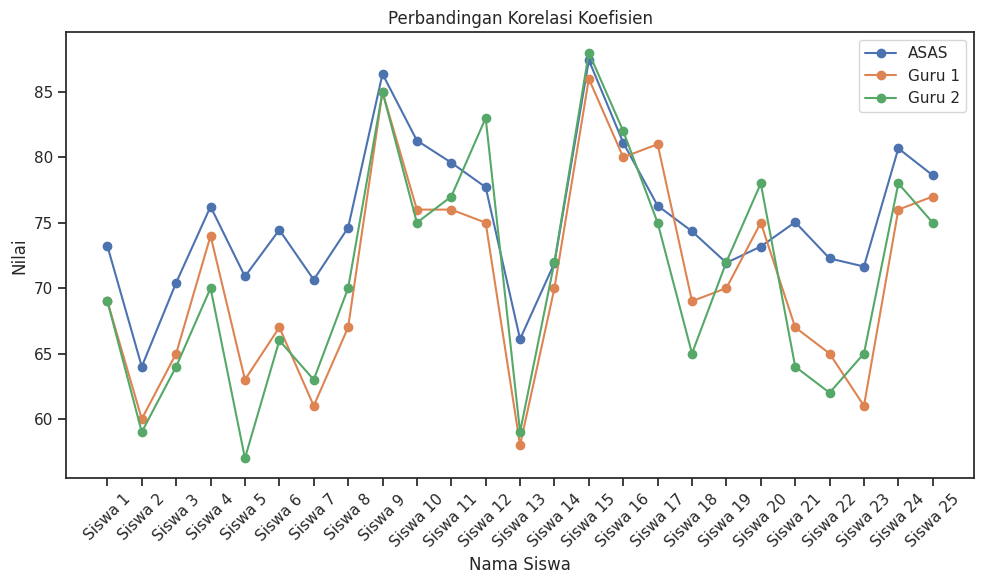

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#excel_file_path = "/content/drive/MyDrive/Evaluasi/evaluasi 1.1.xlsx"
#df1 = pd.read_excel(excel_file_path)

plt.figure(figsize=(10, 6))

for column in ['ASAS', 'Guru 1', 'Guru 2']:
    if column in df_sorting:
        plt.plot(df_sorting['Nama'], df_sorting[column], marker='o', label=column)
    else:
        print(f"Kolom {column} tidak ditemukan dalam DataFrame")

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Korelasi Koefisien')
plt.xlabel('Nama Siswa')
plt.ylabel('Nilai')

# Menambahkan legenda
plt.legend()

# Memutar label sumbu x agar lebih mudah dibaca jika namanya panjang
plt.xticks(rotation=45)

# Menampilkan grafik
plt.tight_layout()
plt.show()
